In [ ]:
!pip install diffusers transformers accelerate scipy safetensors xformers torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.2 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler, StableDiffusionImg2ImgPipeline
from xformers.ops import MemoryEfficientAttentionFlashAttentionOp
import torch
from PIL import Image

torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
#use less vram
request_float16 = True
seed = 42
sd_torch_dtype = torch.float16 if torch_device == 'cuda' and request_float16 else None
model_id = 'stabilityai/stable-diffusion-2-1'

In [ ]:
#optional, add a cell with saving code after the generation if you want to use this
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder='scheduler')
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=sd_torch_dtype)

if torch.cuda.is_available():
  pipe.enable_xformers_memory_efficient_attention(attention_op=MemoryEfficientAttentionFlashAttentionOp)
  pipe.vae.enable_xformers_memory_efficient_attention(attention_op=None)
pipe = pipe.to(torch_device)

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

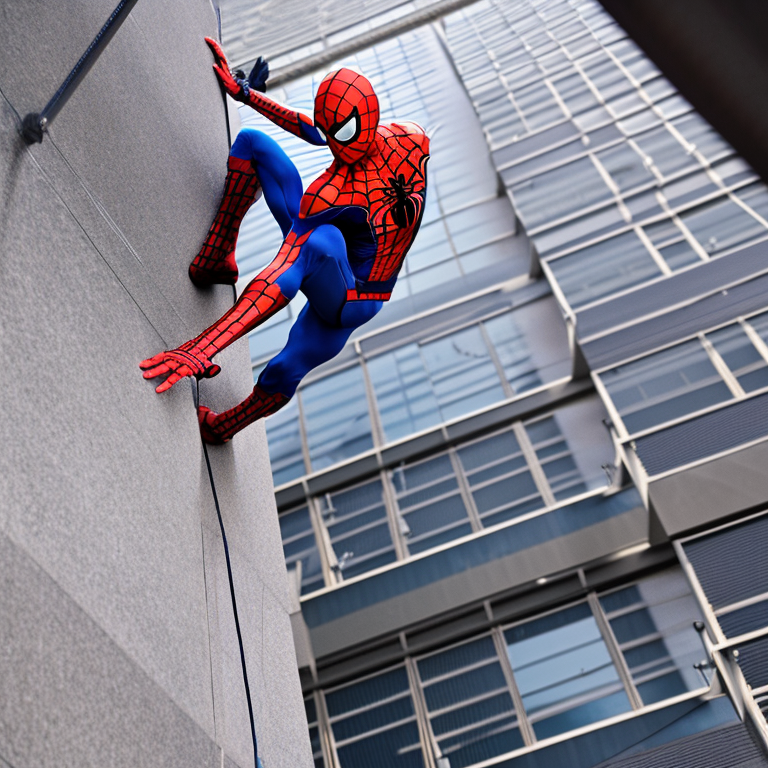

In [ ]:
#-------------------- HERE'S THE GOOD STUFF --------------------
#Preferably run this on a runtime with a GPU e.g. T4 if you don't want to be here all day
#Set this to True to get the same result every time you run for comparison
seed_random = True
generator = torch.Generator(device=torch_device).manual_seed(seed)

prompt = 'spiderman climbing a building, photograph, high quality, realistic, 4k'
negative_prompt = 'low resolution, blurry, low detail, lacking coherence, random objects, strange generation artefacts'
#num_inference_steps: number of diffusion runs, increase to increase quality but make inference slower
#guidance_scale: how close the generated image should be to the text prompt
#If you want multiple images, add num_images_per_prompt and then iterate over the images field
image = pipe(prompt, negative_prompt=negative_prompt, guidance_scale=10, num_inference_steps=50, generator=generator if seed_random else None).images[0]
#Output image directly into notebook cell. If you want to put this into a variable, just do var_name = image
image